# Project 4 - Exploratory Data Analysis

Directory:



# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from functions import monthly, plot_acf_pacf, plot_preds

%matplotlib inline

# Unemployment Data

The unemployment data was the most robust dataset, in terms of time-series, because it had weekly data. We explored the data from 2000 and beyond to see what kind of impact hurricanes Rita and Harvey had on unemployment if any.

In [7]:
# Read in data
unemp = pd.read_csv('./materials/unemp_cleaned.csv',index_col='week_filed',infer_datetime_format=True)

# Format index
unemp.index = pd.to_datetime(unemp.index)

**Look for general trends**

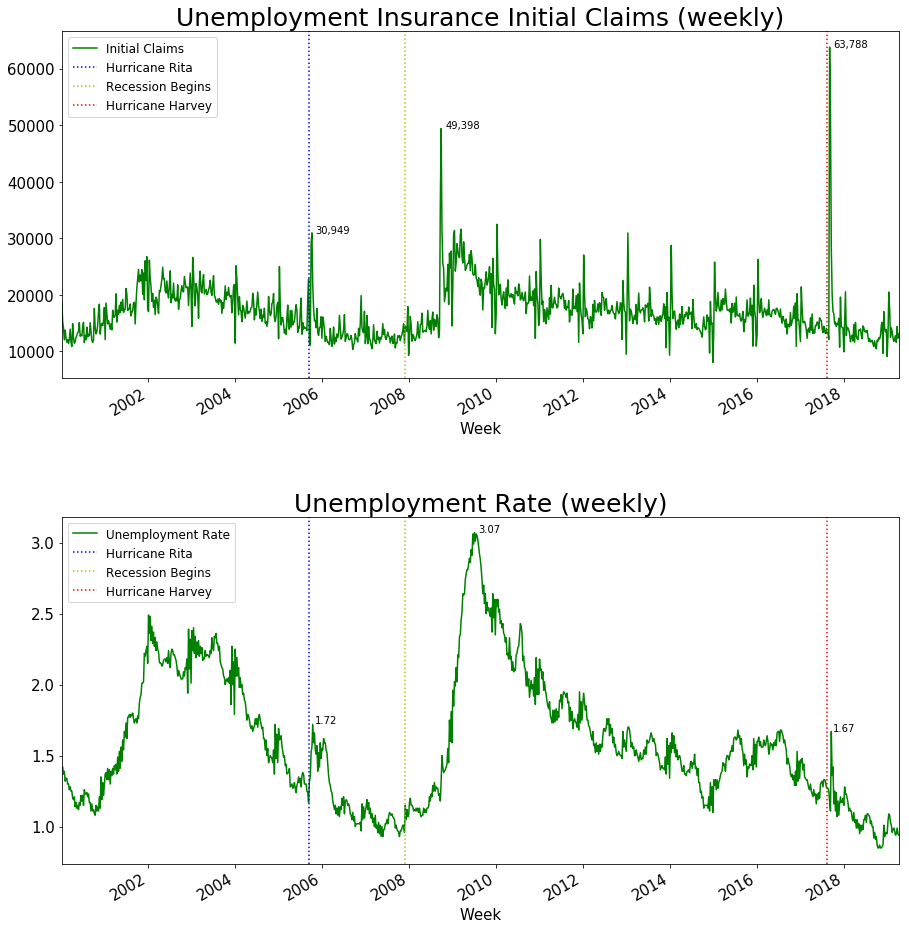

In [10]:
# Set-up subplots
fig, axes = plt.subplots(2, figsize=(15, 17))

# Plot initial claims
unemp['initial_claims'].plot(c='g', fontsize=15, label='Initial Claims', ax=axes[0])
axes[0].axvline(x='2005-09-17', color='b', linestyle=':').set_label('Hurricane Rita')
axes[0].text(x='2005-11', y=30951, s='30,949')

axes[0].axvline(x='2007-12', color='y', linestyle=':').set_label('Recession Begins')
axes[0].text(x='2008-11', y=49400, s='49,398')

axes[0].axvline(x='2017-08-13', color='r', linestyle=':').set_label('Hurricane Harvey')
axes[0].text(x='2017-10', y=63800, s='63,788')

axes[0].set_xlabel('Week', fontsize=15)
axes[0].legend(fontsize='large')
axes[0].set_title('Unemployment Insurance Initial Claims (weekly)', fontsize=25);

# Plot unemployment rate
unemp['unemployment_rate'].plot(c='g', fontsize=15, label='Unemployment Rate', ax=axes[1])
axes[1].axvline(x='2005-09-17', color='b', linestyle=':').set_label('Hurricane Rita')
axes[1].text(x='2005-11', y=1.73, s='1.72')

axes[1].axvline(x='2007-12', color='y', linestyle=':').set_label('Recession Begins')
axes[1].text(x='2009-08', y=3.07, s='3.07')

axes[1].axvline(x='2017-08-13', color='r', linestyle=':').set_label('Hurricane Harvey')
axes[1].text(x='2017-10', y=1.67, s='1.67')

axes[1].set_xlabel('Week', fontsize=15)
axes[1].legend(fontsize='large')
axes[1].set_title('Unemployment Rate (weekly)', fontsize=25)

plt.subplots_adjust(hspace=.4);

**Notes**:

>* At each point in time when Rita and Harvey occured, we can observe an abnormal spike in both unemployment initial claims and rates relative to the trend/seasonality patterns leading up to those disasters.
* We decided to plot the recession to explain a very obvious break in the trend.

### Plot Monthly Employment

In [188]:
# Read in data
wages = pd.read_csv('./materials/wages_cleaned.csv', index_col='Unnamed: 0')
wages.index = pd.to_datetime(wages.index)

# decompose quarterly data to monthly
m = wages[['month_1', 'month_2', 'month_3']].T

a = []
for col in m.columns:
    for each in m[col]:
        a.append(each)

monthly_employment = pd.DataFrame(a,columns=['wage'],
                                 index=pd.date_range(start='2000-01',end='2018-09',freq='MS'))

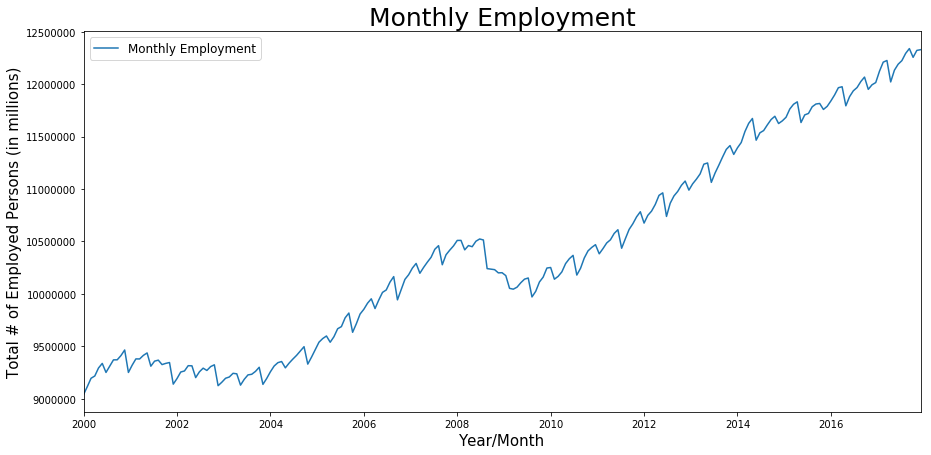

In [189]:
# Plot
ax = monthly_wages.plot(figsize=(15,7), label='Monthly Employment - Statewide')
ax.set_xticklabels(['2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016', '2018'])
ax.set_xlabel('Year/Month', fontsize=15)
ax.set_ylabel('Total # of Employed Persons (in millions)', fontsize=15)
ax.set_title('Monthly Employment', fontsize=25)
ax.ticklabel_format(style='plain', axis='y') # gets rid of scientific notation

ax.legend(labels=['Monthly Employment'], fontsize=12);

**Notes:**
> * This data does seem to show the impact of the recession more significantly, but the impact of the hurricanes aren't as clear

# Construction Employment

We decided to look at particular sector of employment: the construction industry. We believed that the construction industry would be one of the more heavily impacted employment sectors. Whether that impact is negative or positive was the purpose of our data exploration.

## Statewide Monthly Construction

In [128]:
# Read in data
q_construction = pd.read_csv('./materials/construction_cleaned.csv',index_col='Unnamed: 0')


In [133]:
# decompose to monthly
m = q_construction[['month_1', 'month_2', 'month_3']].T

a = []
for col in m.columns:
    for each in m[col]:
        a.append(each)

monthly_construction = pd.DataFrame(a,columns=['employment'],
                                   index=pd.date_range(start='2000-01',end='2018-09',freq='MS'))

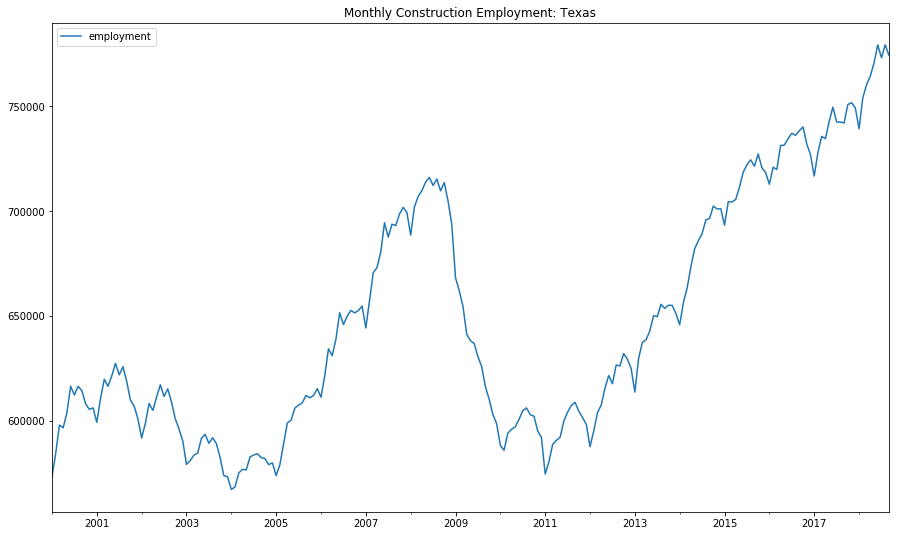

In [164]:
# Plots

monthly_construction.plot(figsize=(15,9),title='Monthly Construction Employment: Texas');

## County-level Construction Employment

In [38]:
# Read in data
construction_county = pd.read_csv('./materials/construction_county_cleaned.csv',index_col='Unnamed: 0')
construction_county.index = pd.to_datetime(construction_county.index)

# Which counties were affected most by Harvey/Rita

### Jefferson County 

In [136]:
jefferson = construction_county[construction_county['county'] == 'jefferson']

# decompose quarterly data to monthly
m = jefferson[['month_1', 'month_2', 'month_3']].T

a = []
for col in m.columns:
    for each in m[col]:
        a.append(each)

monthly_jefferson = pd.DataFrame(a,columns=['employment'],
                                 index=pd.date_range(start='2001-01',end='2018-09',freq='MS'))

# Divide dataframe into pre and post Harvey / pre and post Rita
pre_harvey_jefferson = monthly_jefferson['2001':'2015']
post_harvey_jefferson = monthly_jefferson['2016':]
pre_rita_jefferson = monthly_jefferson['2001':'2004']
post_rita_jefferson = monthly_jefferson['2005':]

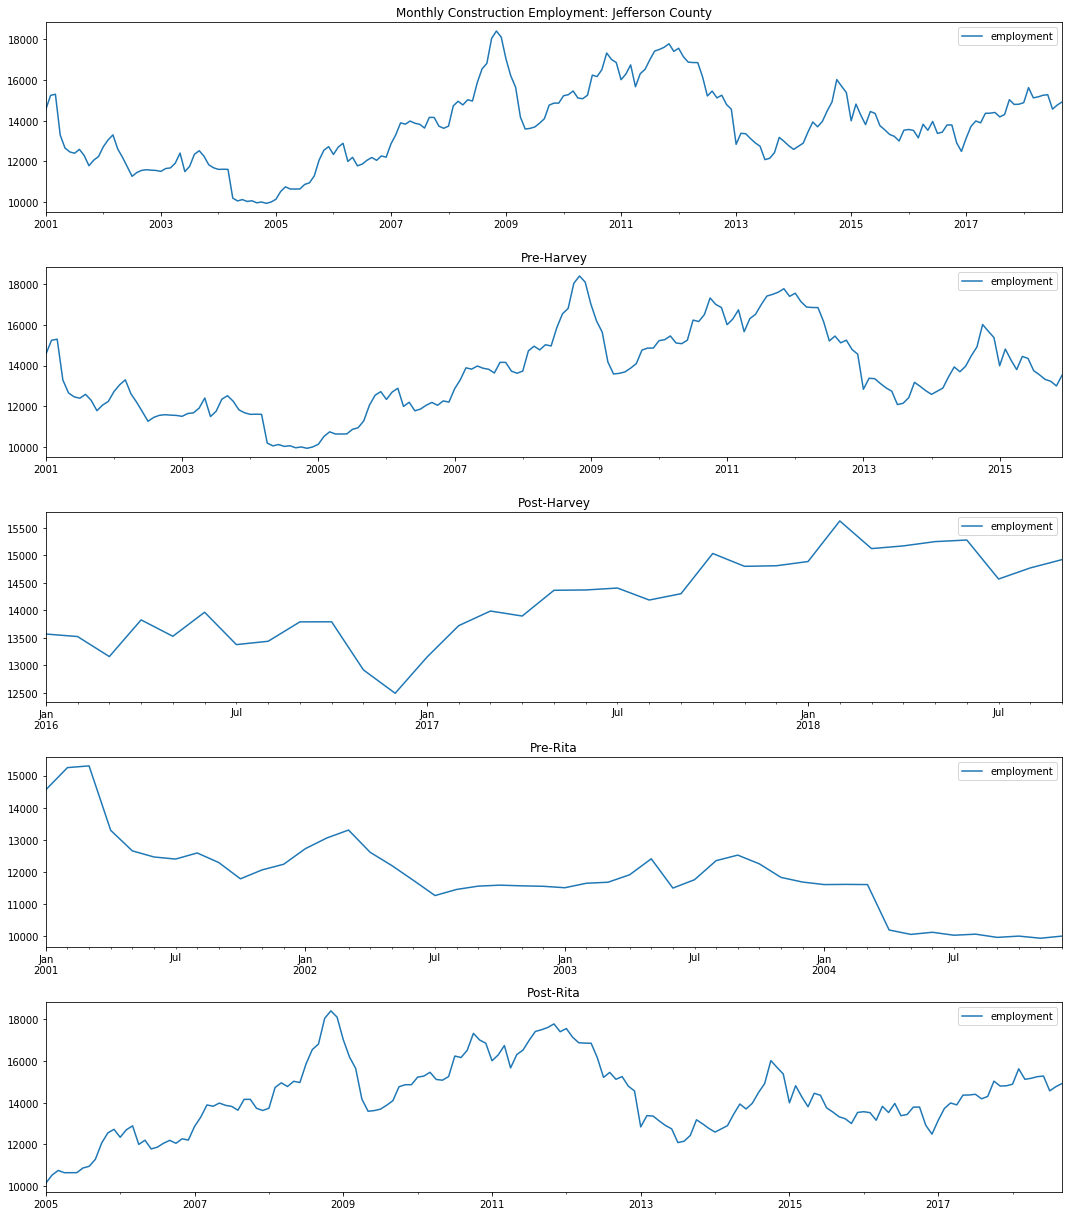

In [146]:
# Plots
fig, axes = plt.subplots(5, figsize=(15, 17))

monthly_jefferson.plot(ax=axes[0])
axes[0].set_title('Monthly Construction Employment: Jefferson County')

pre_harvey_jefferson.plot(ax=axes[1])
axes[1].set_title('Pre-Harvey')

post_harvey_jefferson.plot(ax=axes[2])
axes[2].set_title('Post-Harvey')

pre_rita_jefferson.plot(ax=axes[3])
axes[3].set_title('Pre-Rita')

post_rita_jefferson.plot(ax=axes[4])
axes[4].set_title('Post-Rita')

plt.tight_layout();

**Notes:**



### Orange County Construction Employment

In [165]:
orange = construction_county[construction_county['county'] == 'orange']

# decompose quarterly data to monthly
m = orange[['month_1', 'month_2', 'month_3']].T

a = []
for col in m.columns:
    for each in m[col]:
        a.append(each)

monthly_orange = pd.DataFrame(a,columns=['employment'],
                                 index=pd.date_range(start='2001-01',end='2018-09',freq='MS'))

# Divide dataframe into pre and post Harvey
pre_harvey_orange = monthly_orange['2001':'2015']
post_harvey_orange = monthly_orange['2016':]
pre_rita_orange = monthly_jefferson['2001':'2004']
post_rita_orange = monthly_jefferson['2005':]

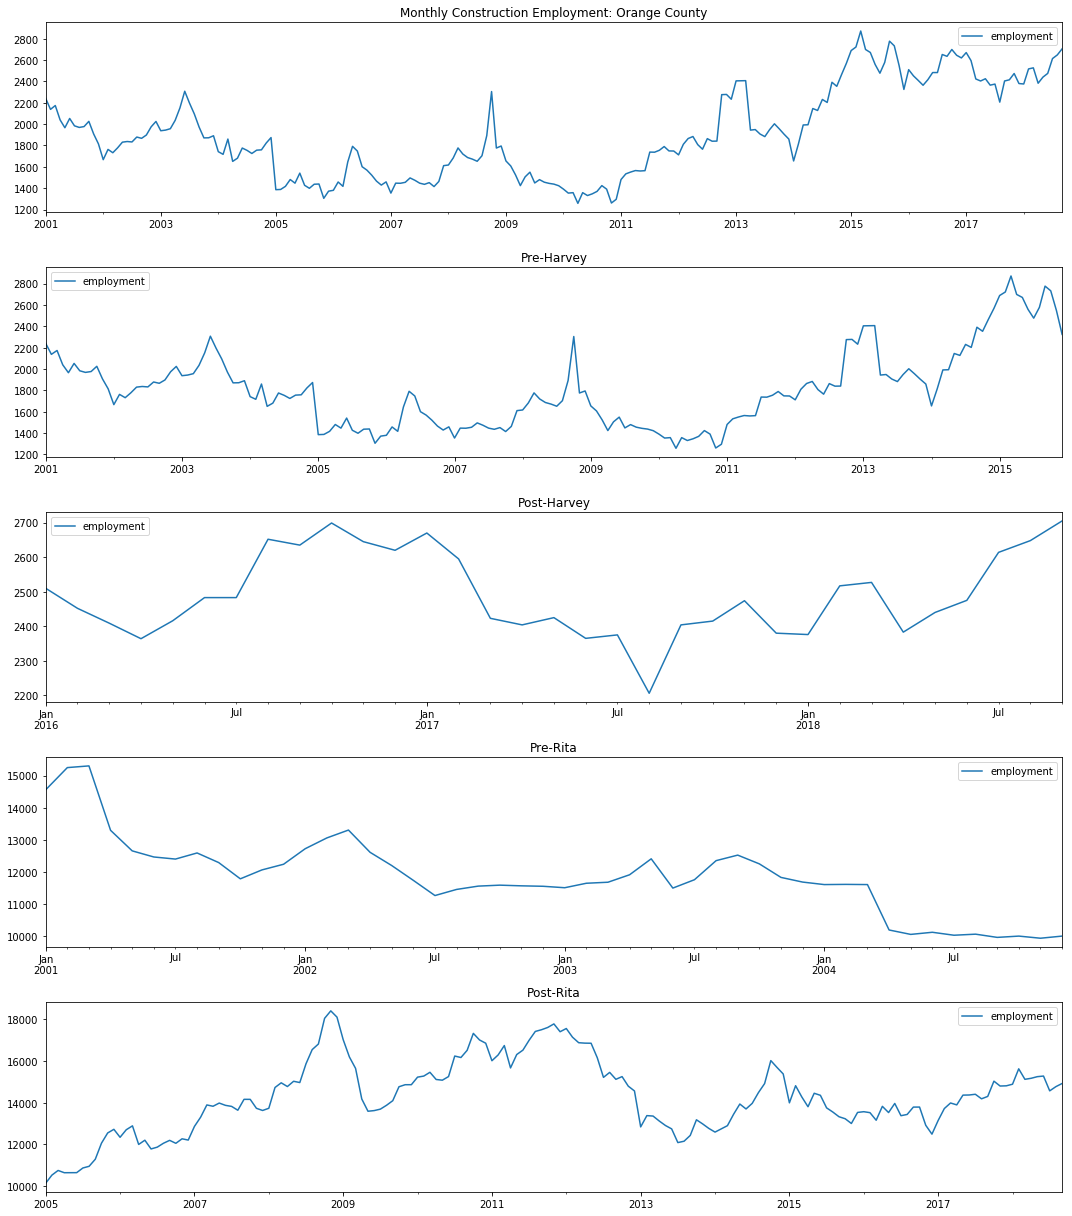

In [166]:
# Plots
fig, axes = plt.subplots(5, figsize=(15, 17))

monthly_orange.plot(ax=axes[0])
axes[0].set_title('Monthly Construction Employment: Orange County')

pre_harvey_orange.plot(ax=axes[1])
axes[1].set_title('Pre-Harvey')

post_harvey_orange.plot(ax=axes[2])
axes[2].set_title('Post-Harvey')

pre_rita_orange.plot(ax=axes[3])
axes[3].set_title('Pre-Rita')

post_rita_orange.plot(ax=axes[4])
axes[4].set_title('Post-Rita')

plt.tight_layout();

**Notes:**


# Wages

### Plot Weekly Wage

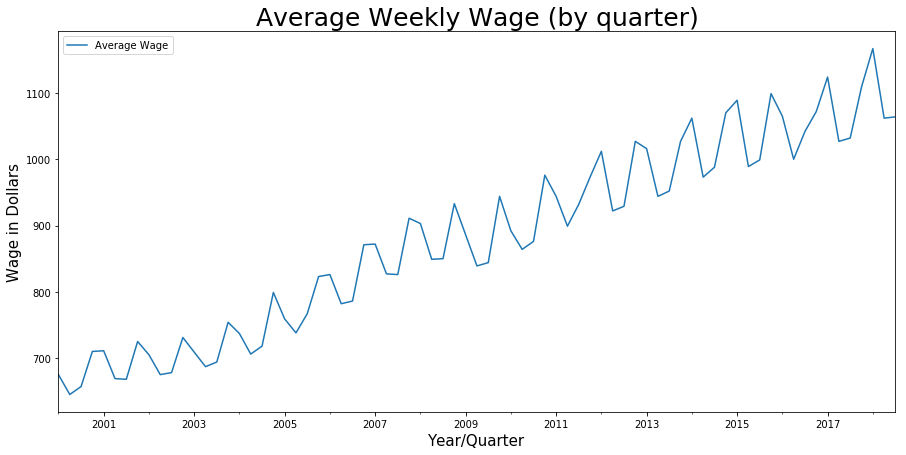

In [175]:
ax = wages['avg_wage'].plot(figsize=(15,7))
ax.set_xlabel('Year/Quarter', fontsize=15)
ax.set_ylabel('Wage in Dollars', fontsize=15)
ax.set_title('Average Weekly Wage (by quarter)', fontsize=25)
ax.legend(labels=['Average Wage']);

**Notes:**
> * Eye-test: Even with simple, visual obesrvation we can see that there are no changes in the seasonal pattern of this data when the hurricanes (and even the recession) hit. We can infer that this data, unless detrended, won't be much use in our time-series modeling.

Somewhat interestingly, the average wage is very highly correlated with the number of companies in the state. This could be something to look into further in the future.

In [34]:
wages.corr()[['avg_wage']].sort_values(by='avg_wage', ascending=False)[1:]

,avg_wage
total_wages,0.987663
year,0.960004
estabs,0.952854
firms,0.944586
month_3,0.942355
avg_emp,0.939948
month_2,0.939740
month_1,0.937178
period,0.044662


# Tableau

In [106]:
rita_affected = pd.DataFrame(rita.loc[rita['avg_inspected_damage'] > 0, 'county'])
rita_affected['hurricane'] = 'rita'

harvey_affected = pd.DataFrame(harvey.loc[harvey['avg_inspected_damage'] > 0, 'county'])
harvey_affected['hurricane'] = 'harvey'

affected_counties = rita_affected.append(harvey_affected).reset_index().drop('index', axis=1)

hurricanes = pd.DataFrame(affected_counties.groupby('county')['hurricane'].sum())

hurricanes['hurricane'] = hurricanes['hurricane'].map({'rita': 'Rita', 'harvey': 'Harvey', 'ritaharvey': 'Both'})

fips = dict(zip(list(affected_counties.drop_duplicates('county')['county'].values), list(affected_counties.drop_duplicates('county')['fips'].values)))

hurricanes['fips'] = fips.values()

affected_counties = hurricanes

affected_counties

NameError: name 'rita' is not defined

In [712]:
counties = pd.read_csv('materials/Tx_county_Fips.csv')

In [715]:
counties.columns = ['county', 'fips']

In [717]:
affected_counties = affected_counties.merge(counties, on='county')

In [765]:
affected_counties.to_csv('affected_counties.csv')

In [686]:
# Rita
30949/17240

1.795185614849188

In [685]:
# Harvey
63788/12344

5.167530784186649

In [680]:
rita['total_damage'].sum() / (harvey['total_damage'].sum() + rita['total_damage'].sum())

0.131482935975064

In [677]:
rita['total_damage'].sum() / harvey['total_damage'].sum()

0.15138785571550842